# This Notebook assesses whether Pole Imagery is flagged as Pornography when trained with "easy", "difficult" non-pole neutral data, pole data and pornography. Uses ROC and more images. This is the best model configuration.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#get directories
pornDir = "/content/drive/MyDrive/PoleVsExplicit/prng dataset/Frames/vPorn"
notPornEasy = "/content/drive/MyDrive/PoleVsExplicit/prng dataset/Frames/vNonPornEasy"
notPornDifficult = "/content/drive/MyDrive/PoleVsExplicit/prng dataset/Frames/vNonPornDifficulty"

In [ ]:
import os
import matplotlib.pyplot as plt

#create image lists


porn = []
notPornE = []
notPornD = []
pole = []

for dir in os.listdir("/content/drive/MyDrive/PoleVsExplicit/poleData/polePoseRecognition"):
  for file in os.listdir("/content/drive/MyDrive/PoleVsExplicit/poleData/polePoseRecognition/" + dir):
    pole.append(plt.imread("/content/drive/MyDrive/PoleVsExplicit/poleData/polePoseRecognition/" + dir + "/" + file))

for file in os.listdir(notPornEasy):
    notPornE.append(plt.imread(notPornEasy + '/' + file))

for file in os.listdir(notPornDifficult):
    notPornD.append(plt.imread(notPornDifficult + '/' + file))
    
for file in os.listdir(pornDir):
    porn.append(plt.imread(pornDir + '/' + file))

In [ ]:
import numpy as np
#randomly select 3500 of each
pornSample = np.random.choice(porn,3500) 
notPornSample = np.concatenate((np.random.choice(notPornE,1569),np.random.choice(notPornD,1569))) # pole has 362, adding total non-porn to 3500 #362/2 = 181
np.random.shuffle(notPornSample)
notPornSample = np.concatenate((pole,notPornSample)) # such that pole data is kept within training when sliced

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

In [ ]:
#create test and train
#70% train 30% test
trainDivide = int(len(pornSample) * 0.7)
validDivide = int(len(pornSample) * 0.2)

pornTrain = pornSample[0:trainDivide]
pornVal = pornSample[trainDivide: trainDivide + validDivide]
pornTest = pornSample[trainDivide + validDivide:]

nPornTrain = notPornSample[0:trainDivide]
nPornVal = notPornSample[trainDivide: trainDivide + validDivide]
nPornTest = notPornSample[trainDivide + validDivide:]

print("Porn Train Images:", len(pornTrain))
print("Porn Validation Images:",len(pornVal))
print("Porn Test Images:",len(pornTest))


print("Neutral Train Images:",len(nPornTrain))
print("Neutral Validation Images:",len(nPornVal))
print("Neutral Test Images:",len(nPornTest))

trainNo = len(pornTrain) + len(nPornTrain)
validNo = len(pornVal) + len(nPornVal)

Porn Train Images: 2450
Porn Validation Images: 700
Porn Test Images: 350
Neutral Train Images: 2450
Neutral Validation Images: 700
Neutral Test Images: 350


In [ ]:
####################################################
# Remove directories if needed
####################################################

trainPath = "/content/drive/MyDrive/PoleVsExplicit/split/train"
validPath = "/content/drive/MyDrive/PoleVsExplicit/split/valid"
testPath = "/content/drive/MyDrive/PoleVsExplicit/split/test"

if os.path.exists(trainPath):
  for directory in os.listdir(trainPath):
    for file in os.listdir(trainPath + "/" + directory):
        os.remove(trainPath + "/" + directory + "/" + file)
    os.rmdir(trainPath + "/" + directory)

if os.path.exists(validPath):
  for directory in os.listdir(validPath):
    for file in os.listdir(validPath + "/" + directory):
        os.remove(validPath + "/" + directory + "/" + file)
    os.rmdir(validPath + "/" + directory)

if os.path.exists(testPath):
  for directory in os.listdir(testPath):
    for file in os.listdir(testPath + "/" + directory):
        os.remove(testPath + "/" + directory + "/" + file)
    os.rmdir(testPath + "/" + directory)

In [ ]:
#create directories for train/test split
if not os.path.exists(trainPath):  
    os.makedirs(trainPath)

if not os.path.exists(validPath):  
    os.makedirs(validPath)

if not os.path.exists(testPath):  
    os.makedirs(testPath)

In [ ]:
#create class directories
if not os.path.exists(trainPath + "/" + "porn"):  
    os.makedirs(trainPath + "/" + "porn")
    
if not os.path.exists(trainPath + "/" + "notPorn"):  
    os.makedirs(trainPath + "/" + "notPorn")

if not os.path.exists(validPath + "/" + "porn"):  
    os.makedirs(validPath + "/" + "porn")

if not os.path.exists(validPath + "/" + "notPorn"):  
    os.makedirs(validPath + "/" + "notPorn")
    
if not os.path.exists(testPath + "/" + "porn"):  
    os.makedirs(testPath + "/" + "porn")
    
if not os.path.exists(testPath + "/" + "notPorn"):  
    os.makedirs(testPath + "/" + "notPorn")

In [ ]:
#Save Split image datasets to directory
from PIL import Image  

for i in range(0,len(pornTrain)):
    fname = "pornTrain_" + str(i)
    im = Image.fromarray(pornTrain[i])
    im.save(("/content/drive/MyDrive/PoleVsExplicit/split/train/porn/") + fname + ".jpg")

for i in range(0,len(pornTest)):
    fname = "pornTest_" + str(i)
    im = Image.fromarray(pornTest[i])
    im.save(("/content/drive/MyDrive/PoleVsExplicit/split/test/porn/") + fname + ".jpg")   


for i in range(0,len(pornVal)):
    fname = "pornVal_" + str(i)
    im = Image.fromarray(pornVal[i])
    im.save(("/content/drive/MyDrive/PoleVsExplicit/split/valid/porn/") + fname + ".jpg")

for i in range(0,len(nPornVal)):
    fname = "nPornVal_" + str(i)
    im = Image.fromarray(nPornVal[i])
    im.save(("/content/drive/MyDrive/PoleVsExplicit/split/valid/notPorn/") + fname + ".jpg")   



for i in range(0,len(nPornTrain)):
    fname = "nPornTrain_" + str(i)
    im = Image.fromarray(nPornTrain[i])
    im = im.convert('RGB') #remove alpha channel included with pole images
    im.save(("/content/drive/MyDrive/PoleVsExplicit/split/train/notPorn/") + fname + ".jpg") 

for i in range(0,len(nPornTest)):
    fname = "nPornTest_" + str(i)
    im = Image.fromarray(nPornTest[i])
    im.save(("/content/drive/MyDrive/PoleVsExplicit/split/test/notPorn/") + fname + ".jpg")

In [ ]:
#delete variables to save RAM
del(porn)
del(notPornE)
del(notPornD)
del(pole)
del(pornSample)
del(notPornSample)
del(pornTrain)
del(pornVal)
del(pornTest)
del(nPornTrain)
del(nPornVal)
del(nPornTest)

[Reference](https://github.com/MaxTitkov/Keras_InceptionV3_Binary_classification/blob/master/complete_model.py)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
#Define Model
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model

tBatchSize = 32 #32-64
vBatchSize = 32
#Define imageDataGenerators and Model
TRAINING_DIR = "/content/drive/MyDrive/PoleVsExplicit/split/train"
training_datagen = ImageDataGenerator()

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(240,240),
    class_mode='binary',
    batch_size=tBatchSize
)
VALIDATION_DIR = "/content/drive/MyDrive/PoleVsExplicit/split/valid"
validation_datagen=ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(240,240),
    class_mode='binary',
    batch_size=vBatchSize
)

inc_model=InceptionV3(include_top=False,
                      input_shape=((240, 240, 3)))

x = Flatten()(inc_model.output)
x = Dense(64, activation='relu', name='dense_one')(x)
x = Dense(64, activation='relu', name='dense_two')(x)
top_model=Dense(1, activation='sigmoid', name='output')(x)
model = Model(inputs=inc_model.input, outputs=top_model)

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics='acc')

Found 4900 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.


In [ ]:
#callback for 93% validation accuracy
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.93):
      print("\nReached 93% validation accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
from math import ceil

#Train model
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=ceil((trainNo/tBatchSize)-1),
                    validation_data=validation_generator,
                    validation_steps= ceil((validNo/ vBatchSize)-1),
                    callbacks=[callbacks],
                    verbose = 1)

Epoch 1/100
153/153 [==============================] - 54s 304ms/step - loss: 0.5210 - acc: 0.8129 - val_loss: 488.5948 - val_acc: 0.5000
Epoch 2/100
153/153 [==============================] - 46s 302ms/step - loss: 0.3767 - acc: 0.8560 - val_loss: 1.1434 - val_acc: 0.5007
Epoch 3/100
153/153 [==============================] - 45s 296ms/step - loss: 0.3235 - acc: 0.8772 - val_loss: 0.4134 - val_acc: 0.8503
Epoch 4/100
153/153 [==============================] - 45s 295ms/step - loss: 0.2213 - acc: 0.9100 - val_loss: 0.3502 - val_acc: 0.8619
Epoch 5/100
153/153 [==============================] - 45s 296ms/step - loss: 0.1941 - acc: 0.9213 - val_loss: 0.6059 - val_acc: 0.8568
Epoch 6/100
153/153 [==============================] - 45s 294ms/step - loss: 0.1708 - acc: 0.9304 - val_loss: 0.3745 - val_acc: 0.8990
Epoch 7/100
153/153 [==============================] - 46s 298ms/step - loss: 0.1760 - acc: 0.9279 - val_loss: 0.8000 - val_acc: 0.8241
Epoch 8/100
153/153 [=========================

In [ ]:
#save model
model.save('/content/drive/MyDrive/PoleVsExplicit/saved models/pVe.h5')

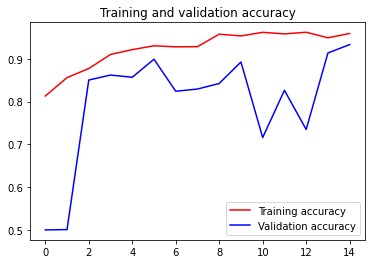

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Test Accuracy of Porn vs NonPorn: 0.9171428571428571
Sensitivity: 0.9828571428571429
Specificity: 0.8514285714285714


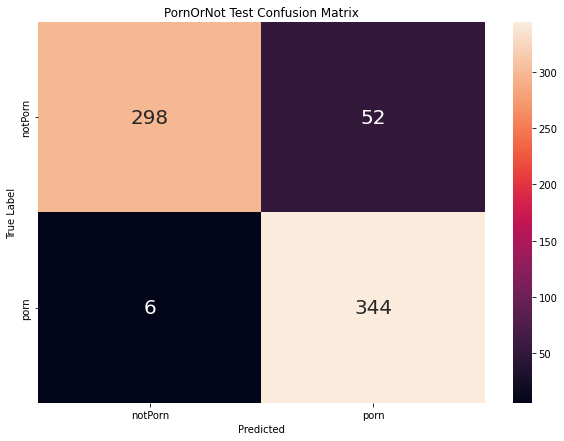

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
from keras.preprocessing import image
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

predictions = []
truths = []


for img in os.listdir("/content/drive/MyDrive/PoleVsExplicit/split/test/porn"):
  img = "/content/drive/MyDrive/PoleVsExplicit/split/test/porn/" + img
  img = image.load_img(img, target_size=(240, 240))
  img = np.expand_dims(img, axis=0)
  #if value of prediction > 0.5, class is '1' (pornography)
  predVal = lambda x: 'porn' if x > 0.5 else 'notPorn'
  predictions.append(predVal(model.predict(img)))
  truths.append("porn")
for img in os.listdir("/content/drive/MyDrive/PoleVsExplicit/split/test/notPorn/"):
  img = "/content/drive/MyDrive/PoleVsExplicit/split/test/notPorn/" + img
  img = image.load_img(img, target_size=(240, 240))
  img = np.expand_dims(img, axis=0)
  #if value of prediction > 0.5, class is '1' (pornography)
  predVal = lambda x: 'porn' if x > 0.5 else 'notPorn'
  predictions.append(predVal(model.predict(img)))
  truths.append("notPorn")


labs = ['notPorn', 'porn']

#confusion matrix

the_matrix = confusion_matrix(truths, predictions, labels=labs)
tn,fp,fn,tp = the_matrix.ravel()


df_cfm = pd.DataFrame(the_matrix, index = labs, columns = labs)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g',annot_kws={"size": 20})
cfm_plot.set_title('PornOrNot Test Confusion Matrix')
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print("Test Accuracy of Porn vs NonPorn:", accuracy_score(truths, predictions))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Test Accuracy of Porn vs Pole: 0.9858823529411764
Sensitivity: 0.9828571428571429
Specificity: 1.0


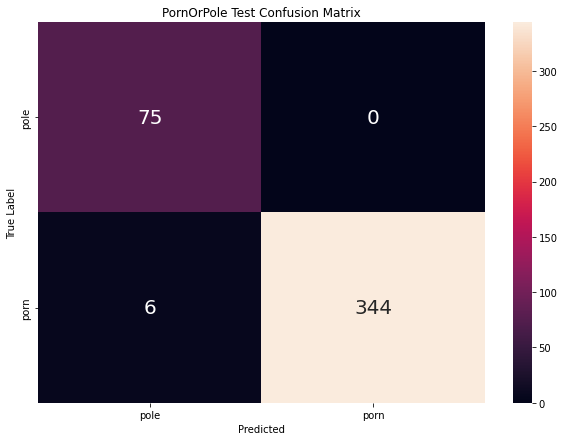

In [ ]:
#assessing for pole moves = pornography?
predictions = []
truths = []


for img in os.listdir("/content/drive/MyDrive/PoleVsExplicit/split/test/porn"):
  img = "/content/drive/MyDrive/PoleVsExplicit/split/test/porn/" + img
  img = image.load_img(img, target_size=(240, 240))
  img = np.expand_dims(img, axis=0)
  #if value of prediction > 0.5, class is '1' (pornography)
  predVal = lambda x: 'porn' if x > 0.5 else 'pole'
  predictions.append(predVal(model.predict(img)))
  truths.append("porn")

for dir in os.listdir("/content/drive/MyDrive/PoleVsExplicit/poleData2/PoleStatic"):
  for img in os.listdir("/content/drive/MyDrive/PoleVsExplicit/poleData2/PoleStatic/" + dir):
    img = "/content/drive/MyDrive/PoleVsExplicit/poleData2/PoleStatic/" + dir + "/" + img
    img = image.load_img(img, target_size=(240, 240))
    img = np.expand_dims(img, axis=0)
    #if value of prediction > 0.5, class is '1' (pornography)
    predVal = lambda x: 'porn' if x > 0.5 else 'pole'
    predictions.append(predVal(model.predict(img)))
    truths.append("pole")



labs = ['pole', 'porn']

#confusion matrix

the_matrix = confusion_matrix(truths, predictions, labels=labs)
tn,fp,fn,tp = the_matrix.ravel()


df_cfm = pd.DataFrame(the_matrix, index = labs, columns = labs)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g',annot_kws={"size": 20})
cfm_plot.set_title('PornOrPole Test Confusion Matrix')
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print("Test Accuracy of Porn vs Pole:", accuracy_score(truths, predictions))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

In [ ]:
predictions = []
truths = []
for img in os.listdir("/content/drive/MyDrive/PoleVsExplicit/split/test/porn"):
  img = "/content/drive/MyDrive/PoleVsExplicit/split/test/porn/" + img
  img = image.load_img(img, target_size=(240, 240))
  img = np.expand_dims(img, axis=0)
  predictions.append(model.predict(img))
  truths.append(1)

for dir in os.listdir("/content/drive/MyDrive/PoleVsExplicit/poleData2/PoleStatic"):
  for img in os.listdir("/content/drive/MyDrive/PoleVsExplicit/poleData2/PoleStatic/" + dir):
    img = "/content/drive/MyDrive/PoleVsExplicit/poleData2/PoleStatic/" + dir + "/" + img
    img = image.load_img(img, target_size=(240, 240))
    img = np.expand_dims(img, axis=0)
    predictions.append(model.predict(img))
    truths.append(0)


#remove extra dimensions
predictions = np.squeeze(predictions)


auc: 0.9992380952380953


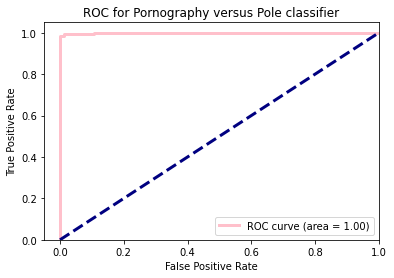

In [ ]:
#plot ROC cuv
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

plt.figure()
fpr, tpr, _ = roc_curve(truths, predictions)
roc_auc = auc(fpr, tpr)


print("auc:",auc(fpr,tpr)) 

plt.plot(
    fpr,
    tpr,
    color="pink",
    lw=3,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Pornography versus Pole classifier")
plt.legend(loc="lower right")
plt.show()
#low fpr and tpr is not always the "best"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'ROC Curve Zoom 03')

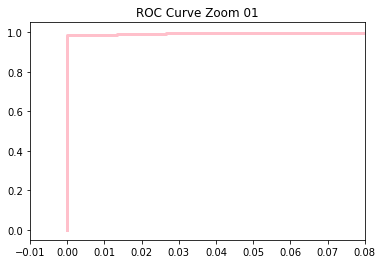

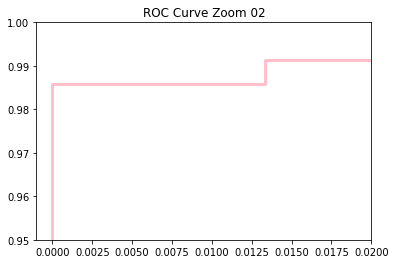

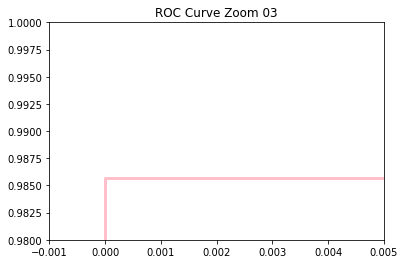

In [ ]:
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="pink",
    lw=3,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.use_sticky_edges = False
plt.xlim([-0.01, 0.08])
plt.title('ROC Curve Zoom 01')

plt.subplot()
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="pink",
    lw=3,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.use_sticky_edges = False
plt.xlim([-0.001, 0.02])
plt.ylim([0.95, 1])
plt.title('ROC Curve Zoom 02')

plt.subplot()
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="pink",
    lw=3,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.use_sticky_edges = False
plt.xlim([-0.001, 0.005])
plt.ylim([0.98, 1])
plt.title('ROC Curve Zoom 03')

Test Accuracy of Porn vs Pole: 0.9788235294117648
Sensitivity: 1.0
Specificity: 0.88


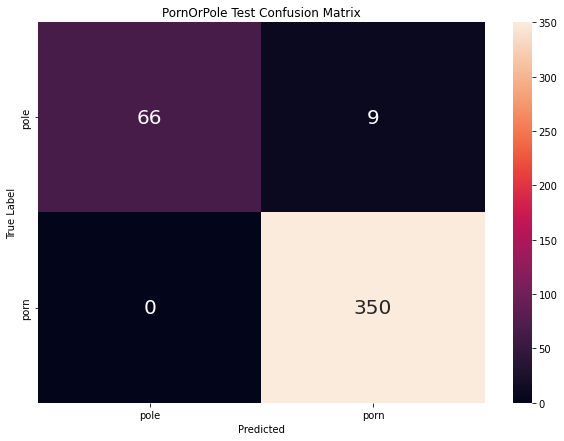

In [ ]:
#find better discrimination threshold based off on ROC

#convert probabilities to classes based on threshold
predVal = lambda x: 'porn' if x > 0.004 else 'pole'
predClass = [predVal(x) for x in predictions]

#convert 1 and 0s back to string values
stringConvert = lambda x: 'porn' if x == 1 else 'pole'
trueClass = [stringConvert(x) for x in truths]

labs = ['pole', 'porn']

#confusion matrix

the_matrix = confusion_matrix(trueClass, predClass, labels=labs)
tn,fp,fn,tp = the_matrix.ravel()


df_cfm = pd.DataFrame(the_matrix, index = labs, columns = labs)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g',annot_kws={"size": 20})
cfm_plot.set_title('PornOrPole Test Confusion Matrix')
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print("Test Accuracy of Porn vs Pole:", accuracy_score(trueClass, predClass))
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
#the ethical debate of spec and sens